In [67]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sets the working directory.
os.chdir("C:\\Users\\fshen\OneDrive\\Documents\\AI Precision Nutrition Bootcamp\\T2D")

### Subjects

In [72]:
# Create data frame from "Subjects.txt" using [tab] as separator, top row as header
subjects = pd.read_csv("Subjects.txt", sep = "\t")

# Select only subjects with known insulin sensitivity and known BMI and known race
subjects_IR_IS_known = subjects[(subjects["IR_IS_classification"] != "Unknown") 
                                 & (subjects["BMI"].notna())
                                 & (subjects["Race"] != "unknown")]

# Factorize sex, insulin sensitivity, race, then reorganize to only show important data

sex_cats = pd.CategoricalDtype(categories = ["F", "M"], ordered = False)
subjects_IR_IS_known["Sex_categorical"] = subjects_IR_IS_known["Sex"].astype(sex_cats)

IR_IS_cats = pd.CategoricalDtype(categories = ["IS", "IR"], ordered = False)
subjects_IR_IS_known["IR_IS_classification"] = subjects_IR_IS_known["IR_IS_classification"].astype(IR_IS_cats)

race_cats = pd.CategoricalDtype(categories = ["C", "A", "B", "H"], ordered = False)
subjects_IR_IS_known["Race"] = subjects_IR_IS_known["Race"].astype(race_cats)

subjects_IR_IS_known = subjects_IR_IS_known.rename({"IR_IS_classification": "IR_IS"}, axis = 1)
subjects_IR_IS_known = subjects_IR_IS_known.drop(columns = ["Study"])
subjects_IR_IS_known.describe()

C:\Users\fshen\AppData\Local\Temp\ipykernel_13924\519594171.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subjects_IR_IS_known["Sex_categorical"] = subjects_IR_IS_known["Sex"].astype(sex_cats)
C:\Users\fshen\AppData\Local\Temp\ipykernel_13924\519594171.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subjects_IR_IS_known["IR_IS_classification"] = subjects_IR_IS_known["IR_IS_classification"].astype(IR_IS_cats)
C:\Users\fshen\AppData\Local\Temp\ipykernel_13924\519594171.py:18: SettingWithCopyWarnin

,Age,BMI,SSPG
count,64.000000,64.000000,64.000000
mean,56.191250,28.846719,149.830625
std,7.402171,3.788701,65.370466
min,38.800000,21.470000,40.000000
25%,50.960000,25.970000,91.875000
50%,56.430000,28.745000,156.935000
75%,61.942500,31.312500,213.547500
max,69.000000,38.900000,276.000000


### Visits

In [69]:
# Create data frame from "Visits.txt" using [tab] as separator, top row as header
visits = pd.read_csv("Visits.txt", sep = "\t")
visits.shape

# Select only the visits from subjects listed in subjects_IR_IS_known
visits_known = visits[visits["SubjectID"].isin(subjects_IR_IS_known["SubjectID"])]
visits_known.shape

(1098, 8)

### Clinical Tests

In [70]:
# Create data frame from "clinical_tests.txt" using [tab] as separator, top row as header
clinicals = pd.read_csv("HMP/Clinical/clinical_tests.txt", sep = "\t")
clinicals.shape

# Rename SubjectID to SubjectID_2 (reserve SubjectID for another column)
clinicals = clinicals.rename({"SubjectID": "SubjectID_2"}, axis = 1)

# New SubjectID column using VisitID (split using '-')
clinicals["SubjectID"] = clinicals["VisitID"].str.split(pat = '-')
clinicals.head()

# Only keep rows with corresponding data in subjects_IR_IS_known and visits_known
clinicals_known = clinicals[clinicals["VisitID"].isin(visits_known["VisitID"])]
clinicals_known.describe()

# Count values, sort by alphabetical order (Ant -> antibiotic, Imz -> immunization)
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6666404/
clinicals_known["CL4"].value_counts().sort_index()

CL4
Allergy            2
Ant               14
Ant_L              4
Colonoscopy        3
Colonoscopy_L      1
Fiber             31
Healthy          406
Imz               69
Imz_L             23
Infection         66
Infection_L       36
Post-Travel        2
Stress             2
Stress_L           1
Weight-gain       22
Weight-loss       23
Name: count, dtype: int64

### Exploratory Analysis

<Axes: xlabel='Race', ylabel='count'>

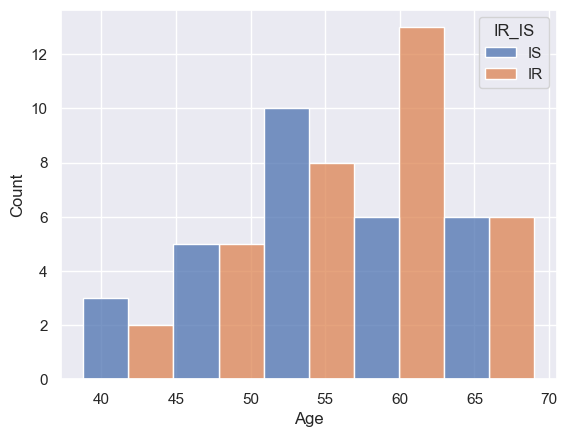

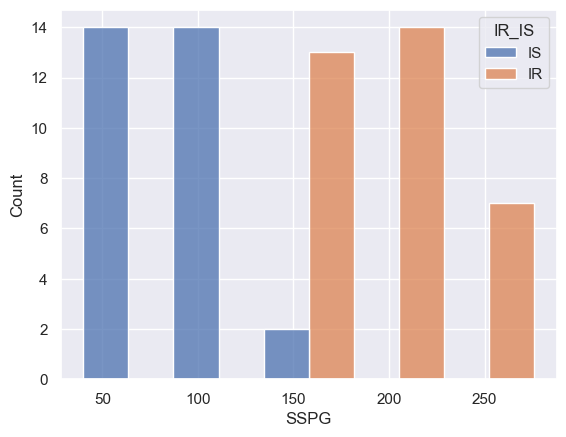

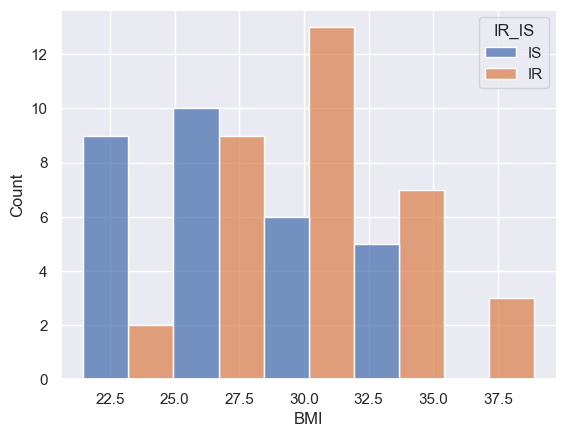

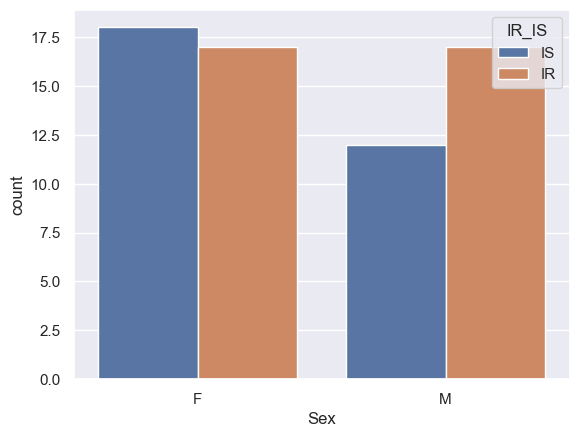

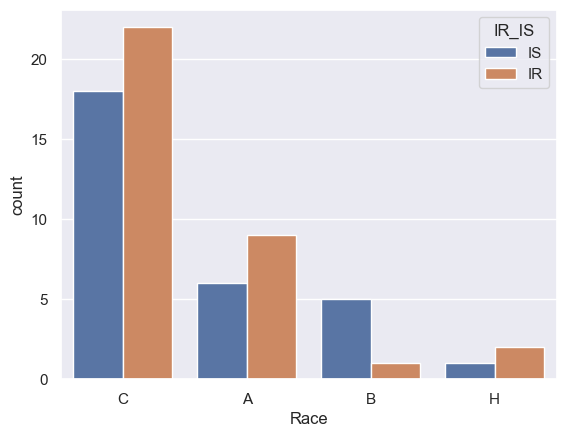

In [89]:
sns.set_theme()

# Histograms
plt.figure()
sns.histplot(subjects_IR_IS_known, x = "Age", bins = 5, hue = "IR_IS", multiple = "dodge")

plt.figure()
sns.histplot(subjects_IR_IS_known, x = "SSPG", bins = 5, hue = "IR_IS", multiple = "dodge")

plt.figure()
sns.histplot(subjects_IR_IS_known, x = "BMI", bins = 5, hue = "IR_IS", multiple = "dodge")

# Bar plots
plt.figure()
sns.countplot(subjects_IR_IS_known, x = "Sex", hue = "IR_IS")

plt.figure()
sns.countplot(subjects_IR_IS_known, x = "Race", hue = "IR_IS")